<span style="font-size: 18px;"> portfolio project 01: TF with Keras API (Regression task on king county, WA housing market)</span>

It's looking at historical housing market dataset in King county, WA to predict the price (Regression Problem)

<span style="font-size: 14px;">First we being by importing the nessessary packages </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houseData = pd.read_csv("../DATA/kc_house_data.csv")

In [3]:
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


checking for null values 

In [4]:
houseData.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

it's good to have a statistical overview of the dataset before dive in

In [5]:
houseData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<span style="font-size: 18px;">EDA</span>

<Figure size 1200x800 with 0 Axes>

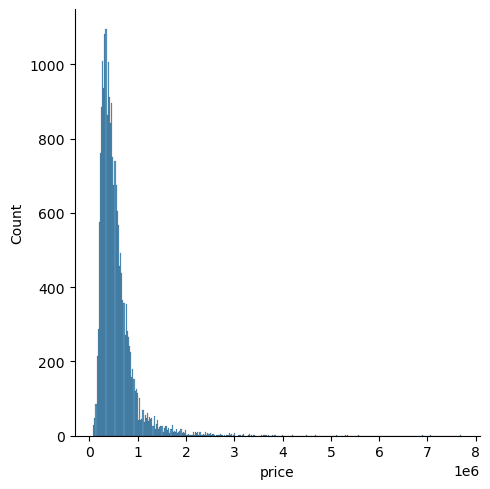

In [6]:
plt.figure(figsize=(12,8))
sns.displot(houseData['price'])

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

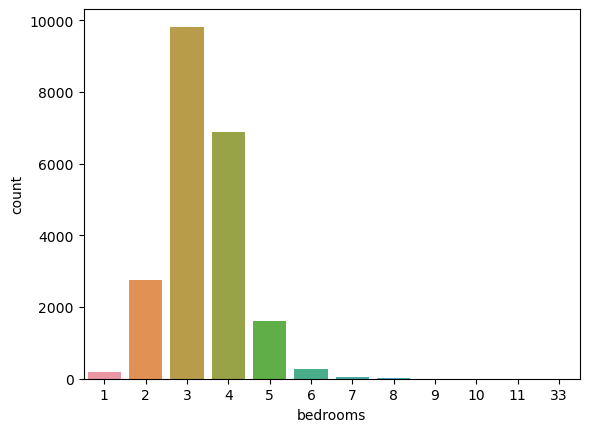

In [7]:
sns.countplot(data=houseData,x='bedrooms')

<Figure size 1000x800 with 0 Axes>

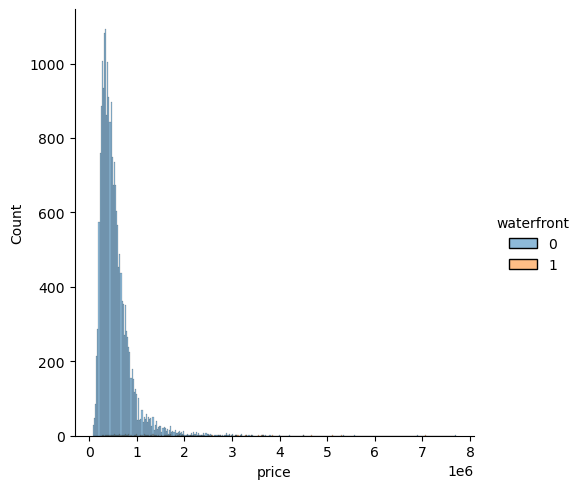

In [8]:
plt.figure(figsize=(10,8))
sns.displot(data=houseData, x='price',hue='waterfront')


In [9]:
houseData.corr()['price']

/tmp/ipykernel_913113/3910042692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houseData.corr()['price']


id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

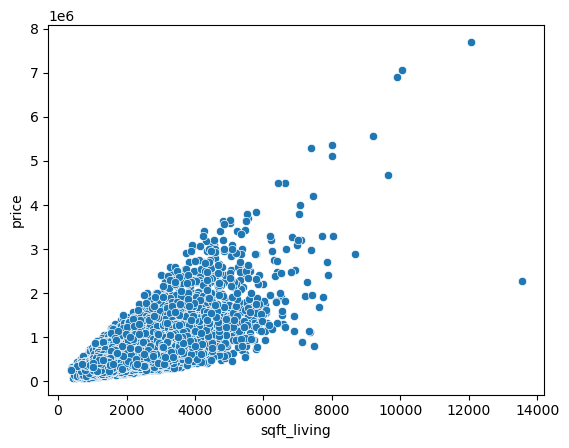

In [10]:
sns.scatterplot(data=houseData, x='sqft_living', y='price')

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

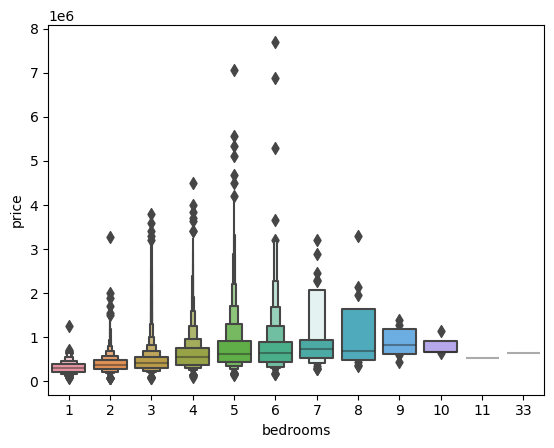

In [11]:
sns.boxenplot(data=houseData, x='bedrooms', y='price')

Let's check to see if the price of the house changes or effected by the lattitude and longitue 

<AxesSubplot: xlabel='lat', ylabel='price'>

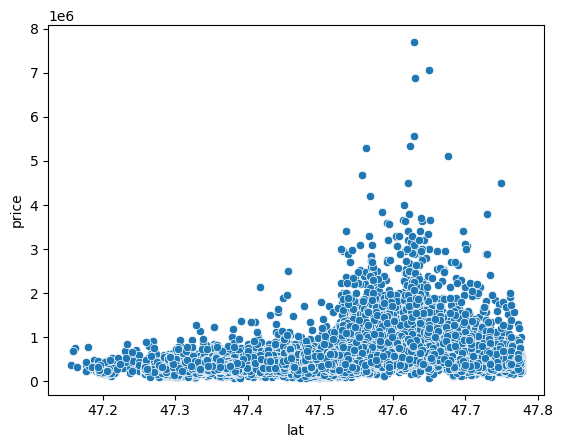

In [12]:
sns.scatterplot(data=houseData, x='lat', y='price')

<AxesSubplot: xlabel='long', ylabel='price'>

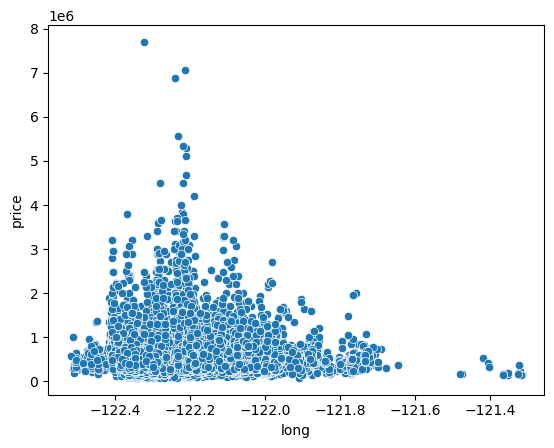

In [13]:
sns.scatterplot(data=houseData, x='long', y='price')

it looks like certian lat and long have higher prices

<AxesSubplot: xlabel='long', ylabel='lat'>

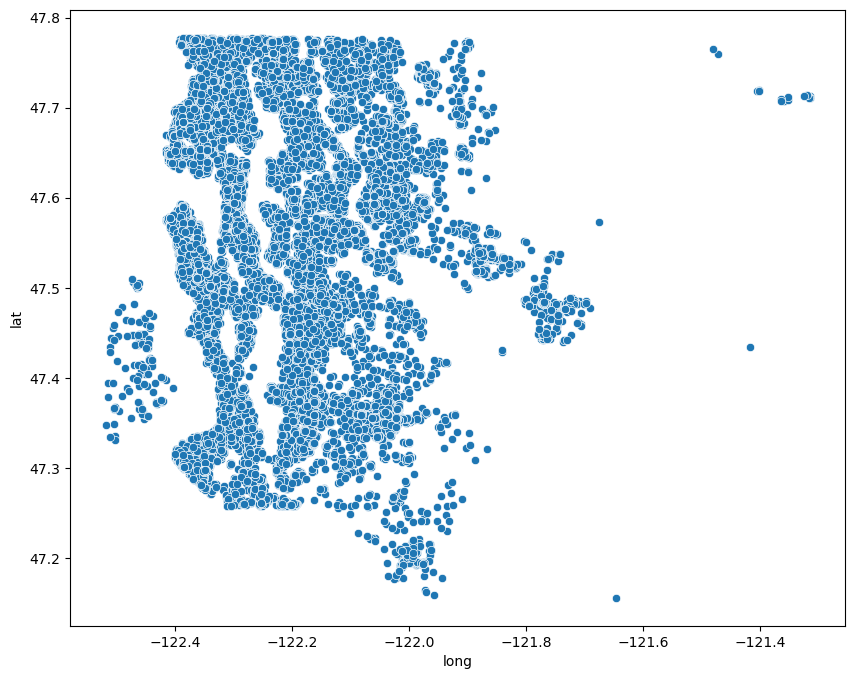

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=houseData, x='long', y='lat')

<AxesSubplot: xlabel='long', ylabel='lat'>

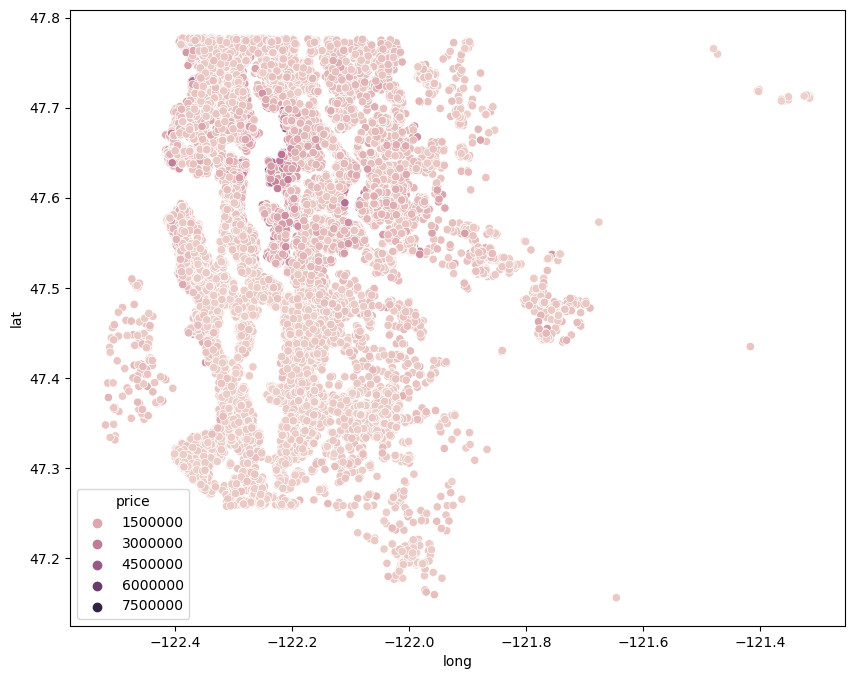

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=houseData, x='long', y='lat', hue='price')

Coloring with respect to price is great but but to the really expensive house the color gradient is not much vissible

let's see the house prices closly

In [16]:
houseData.sort_values('price', ascending=False).head(20)['price']

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
Name: price, dtype: float64

In [17]:
len(houseData)

21597

let's take out the first 1% of the houses remove from the data set to reduce the outlier 

In [18]:
houses_99 = houseData.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot: xlabel='long', ylabel='lat'>

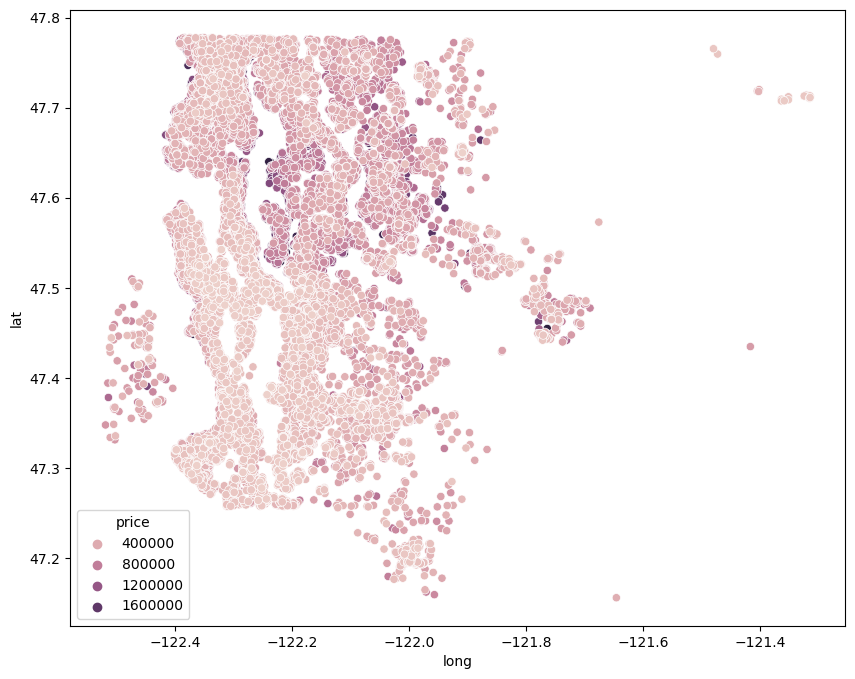

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=houses_99, x='long', y='lat', hue='price')

Color by the water front Yes or No

<AxesSubplot: xlabel='long', ylabel='lat'>

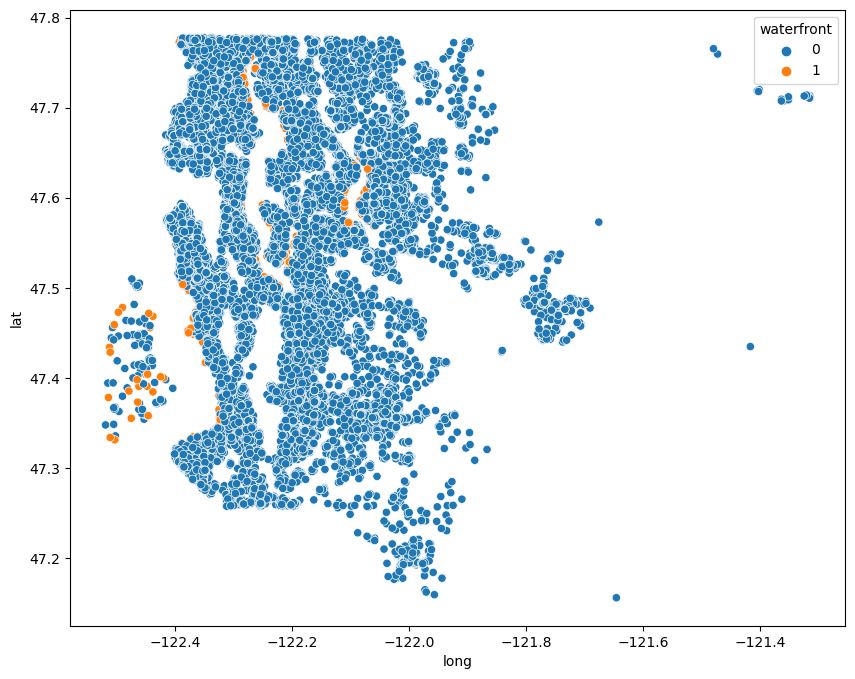

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=houseData, x='long', y='lat', hue='waterfront')

to improve the visualization edge color, color palette, and alpha parameters needs to changed

<AxesSubplot: xlabel='long', ylabel='lat'>

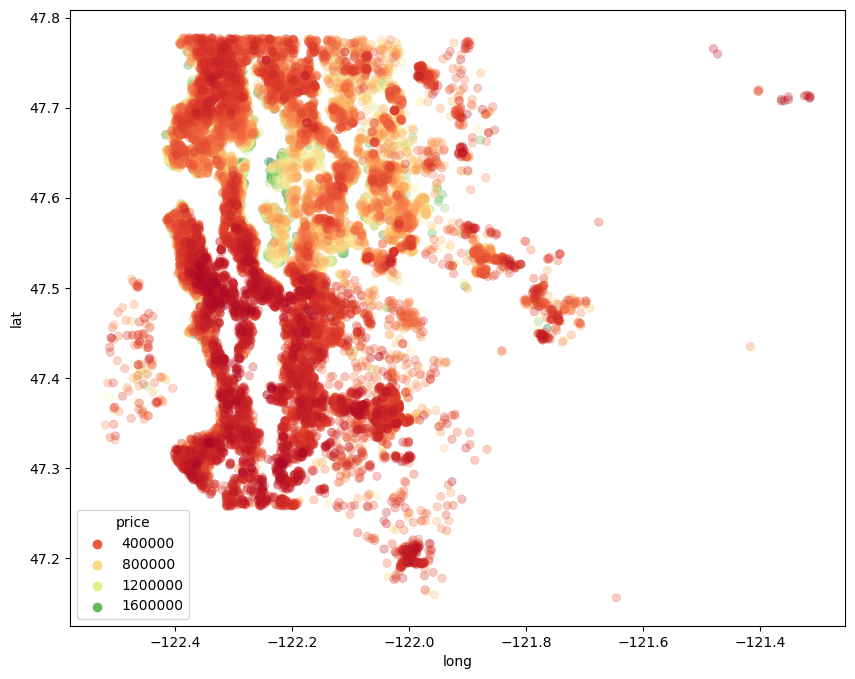

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=houses_99, x='long', y='lat', hue='price', palette="RdYlGn", edgecolor=None, alpha=0.3)

it looks like the houses that are on water front's are more expensive

<AxesSubplot: xlabel='waterfront', ylabel='price'>

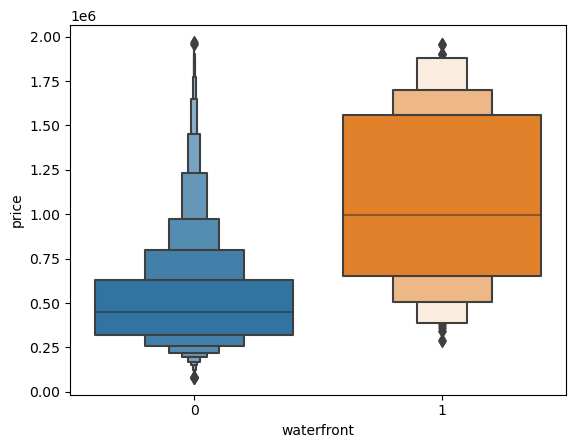

In [22]:
sns.boxenplot(data=houses_99, x='waterfront', y='price')

Feature engeneering, removing unnessessary features

In [23]:
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


look like the coloumn 'id' doesn't make a good feature. Going to drop it.

In [24]:
houseData = houseData.drop('id', axis=1)

In [25]:
houseData['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

here the date is on a string format and extracting anyother infomation like month or date is difficult. Thus, I'm converting date in to tatetime object

In [26]:
houseData['date']=pd.to_datetime(houseData['date'])

In [27]:
houseData['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

now that I have access to date month and year, I'm going to creat new columns for months and years

In [28]:
houseData['year']=houseData['date'].apply(lambda date: date.year)
houseData['month']=houseData['date'].apply(lambda date: date.month)

In [29]:
houseData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


EDA on newly formed coloumns

<AxesSubplot: xlabel='month', ylabel='price'>

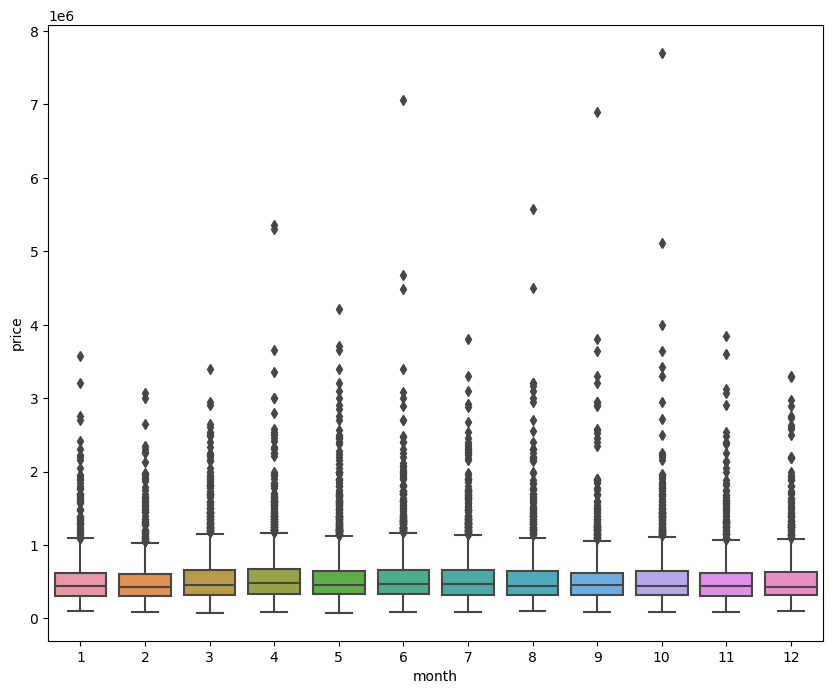

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(data=houseData, x='month', y='price')

<AxesSubplot: xlabel='year', ylabel='price'>

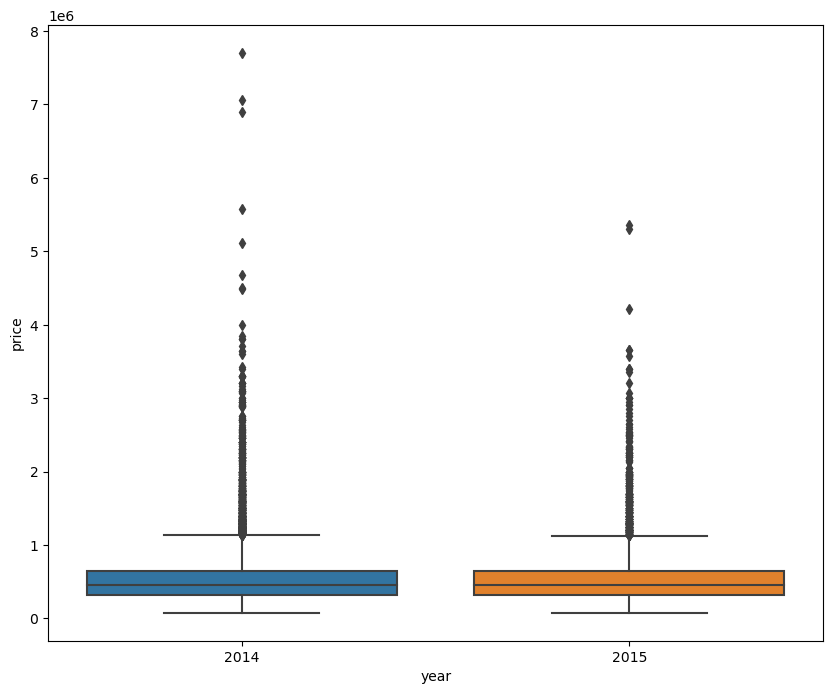

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(data=houseData, x='year', y='price')

/tmp/ipykernel_913113/4048369897.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  houseData.groupby('year').mean()['price'].plot()


<AxesSubplot: xlabel='year'>

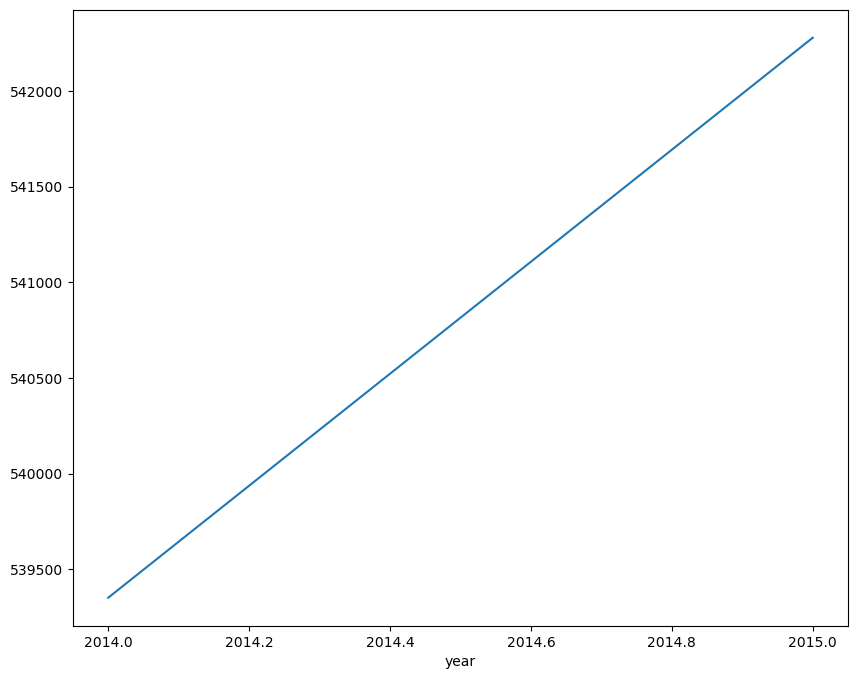

In [32]:
plt.figure(figsize=(10,8))
houseData.groupby('year').mean()['price'].plot()

/tmp/ipykernel_913113/3362576328.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  houseData.groupby('month').mean()['price'].plot()


<AxesSubplot: xlabel='month'>

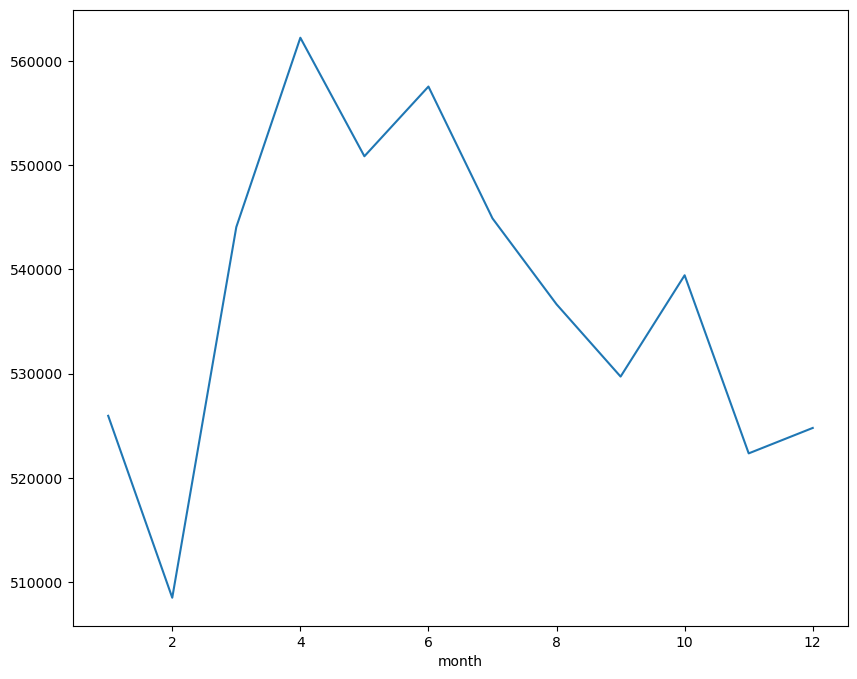

In [33]:
plt.figure(figsize=(10,8))
houseData.groupby('month').mean()['price'].plot()

now that we have month and year, we don't need the date coloumn

In [34]:
houseData = houseData.drop('date', axis=1)

let's look at the avilable coloumns now

In [35]:
houseData.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


the zipcode maybe treated by the ANN as a continus variable. to avoid that we may need to catogorize it (feature engeneer) or drop it. as there are 70 separate zip codes it's best to drop it.

In [36]:
houseData = houseData.drop('zipcode',axis=1)

Data preperation for model training


In [37]:
X = houseData.drop('price', axis=1).values
y = houseData['price'].values

Since TF works with np arrays .values method is used to convert data frame to numpy arrays

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

Now we have to scale the dataset

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test) # here we are not fiting the X-test as we don't want the model to be biased for the test set

In [44]:
#Model import
# Importing Sequntial from the TF library

In [ ]:
from tensorflow.keras.models import Sequential

2023-03-02 11:06:10.034969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 11:06:11.558668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /packages/apps/jupyter/2022-05-26/lib
2023-03-02 11:06:11.558698: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 11:06:15.668665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot 

In [ ]:
#we also need the layers 

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu')) #since the incoming data has 19 features, a 19 node first layer was selected
model.add(Dense(19, activation='relu')) #the follwoing layers with 19 nodes maybe overkill and probably overfitting the data
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) # output layer

model.compile(optimizer='adam', loss='mse') #adam method is used to optimized the learning rate and the loss function is mean squared error

2023-03-02 11:06:20.506613: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /packages/apps/jupyter/2022-05-26/lib
2023-03-02 11:06:20.507666: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-02 11:06:20.507692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c106.sol.rc.asu.edu): /proc/driver/nvidia/version does not exist
2023-03-02 11:06:20.509692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test), #validation data is to validate the model accuracy agist, the mode is not influenced by it
          batch_size=128, epochs=400) # since it's a larger dataset data needs to be fed in batch wise. smaller the batch size the slower the model training is however the model bias is lowered. as a convention the batch sized are given in power of 2

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 430250000384.0000 - val_loss: 418972827648.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429868482560.0000 - val_loss: 417523564544.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 423403257856.0000 - val_loss: 402197905408.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 387949985792.0000 - val_loss: 340055261184.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 290715860992.0000 - val_loss: 213370732544.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 161141800960.0000 - val_loss: 110987821056.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 103286038528.0000 - val_loss: 94901379072.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97429217280.0000 - val_loss: 93585481728.0000
Epoch 9/400
119/119

In [50]:
#checking the model performance
#1. training loss vs validation loss

In [51]:
losses = pd.DataFrame(model.history.history)

In [52]:
losses.head()

,loss,val_loss
0,4.302500e+11,4.189728e+11
1,4.298685e+11,4.175236e+11
2,4.234033e+11,4.021979e+11
3,3.879500e+11,3.400553e+11
4,2.907159e+11,2.133707e+11


<AxesSubplot: >

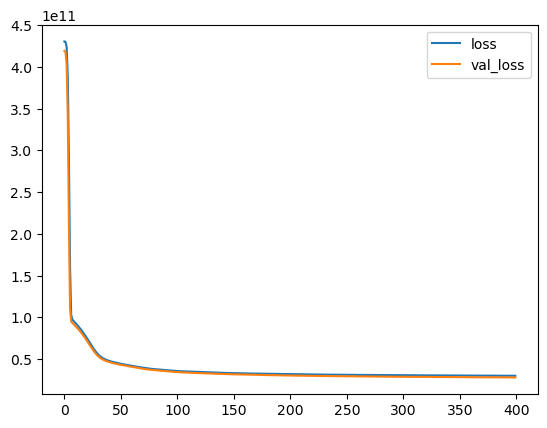

In [53]:
losses.plot()

This is the expected behavior for a correctly trained model. the Val_loss curve would go up after a certian epoch if the model's been overfitting to the training data

Let's have a look at the model quality matrix

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [55]:
#predictions
predictions = model.predict(X_test)

203/203 [==============================] - 0s 717us/step


In [56]:
mean_absolute_error(y_test,predictions)

104271.9256594811

This means the value predicted by the model can have a error of $104,100.81 for a house. Let's have look at the mean prices of the houses

In [57]:
houseData['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

mean price of a house is around $550,000$ and model prediction is off by ~$100,000 (20%) 

In [58]:
np.sqrt(mean_squared_error(y_test,predictions))

168043.80798582133

In [59]:
explained_variance_score(y_test,predictions)

0.7875520604896892

what this score mean is that, the model can explain ~80% of data 

Text(0, 0.5, 'predicted value')

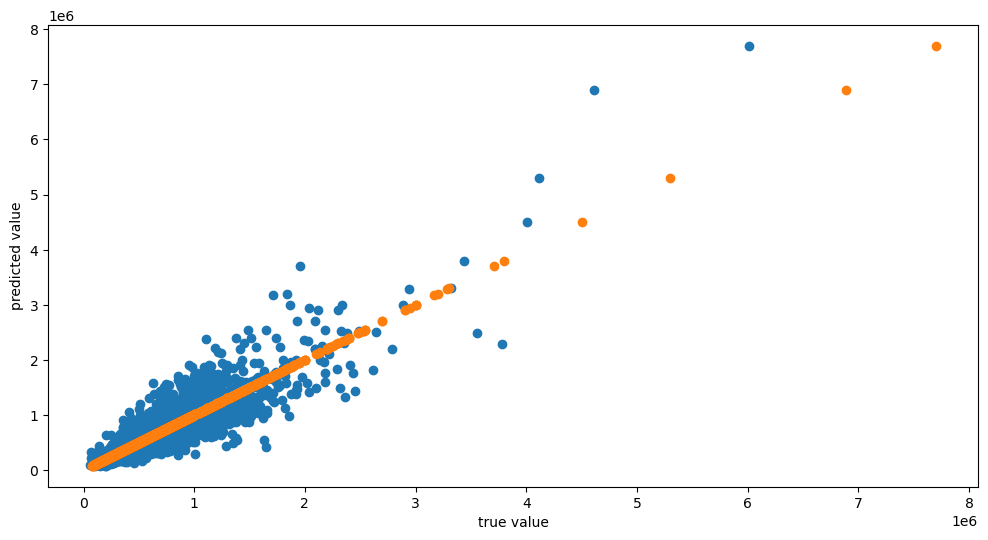

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(predictions,y_test)
plt.scatter(y_test,y_test)
plt.xlabel('true value')
plt.ylabel('predicted value')

the model is very good predicting the price of the houses up to 2-3 Mil. the really expensive houses are being outliers

#predicting a price a new house

In [61]:
new_house = houseData.drop('price',axis=1).iloc[0].values

In [62]:
#scaling
new_house = scaler.transform(new_house.reshape(-1,19)) #reshaping is needed as the scaler was trained on a 2D array. reshape(-1,n) would add an extra dimention

In [63]:
model.predict(new_house)

1/1 [==============================] - 0s 21ms/step


array([[288535.5]], dtype=float32)

In [64]:
houseData.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


looks like the model is over pridicting the value's this is may be due to haveing the expensive houses(outliers) in the data

In [65]:
#traing a model on the bottom 99% of houses

In [67]:
# houses_99['date']=pd.to_datetime(houses_99['date'])
# houses_99['year']=houses_99['date'].apply(lambda date: date.year)
# houses_99['month']=houses_99['date'].apply(lambda date: date.month)
# houses_99 = houses_99.drop('date', axis=1)
# houses_99 = houses_99.drop('date', axis=1)
houses_99 = houseData.sort_values('price', ascending=False).iloc[216:]

X = houses_99.drop('price', axis=1).values
y = houses_99['price'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

model = Sequential()

model.add(Dense(19, activation='relu')) 
model.add(Dense(19, activation='relu')) 
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') 

model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test), 
          batch_size=128, epochs=800) 

Epoch 1/800
117/117 [==============================] - 1s 2ms/step - loss: 346868514816.0000 - val_loss: 356817240064.0000
Epoch 2/800
117/117 [==============================] - 0s 2ms/step - loss: 345102581760.0000 - val_loss: 350346018816.0000
Epoch 3/800
117/117 [==============================] - 0s 2ms/step - loss: 319144099840.0000 - val_loss: 290025537536.0000
Epoch 4/800
117/117 [==============================] - 0s 2ms/step - loss: 207190458368.0000 - val_loss: 127441813504.0000
Epoch 5/800
117/117 [==============================] - 0s 2ms/step - loss: 75461541888.0000 - val_loss: 56468525056.0000
Epoch 6/800
117/117 [==============================] - 0s 2ms/step - loss: 54317580288.0000 - val_loss: 54662873088.0000
Epoch 7/800
117/117 [==============================] - 0s 2ms/step - loss: 53239373824.0000 - val_loss: 53590450176.0000
Epoch 8/800
117/117 [==============================] - 0s 2ms/step - loss: 52231364608.0000 - val_loss: 52534231040.0000
Epoch 9/800
117/117 [===

<AxesSubplot: >

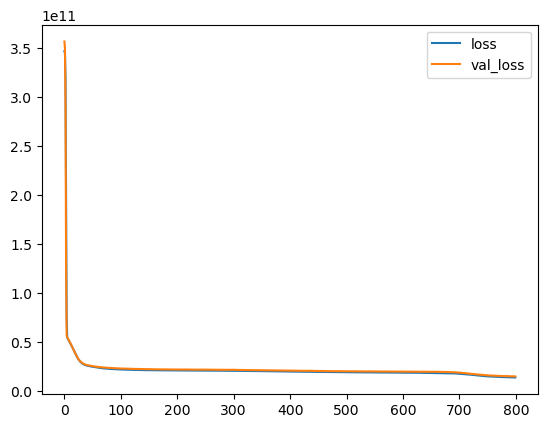

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [69]:
predictions = model.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(explained_variance_score(y_test,predictions))

201/201 [==============================] - 0s 810us/step
78537.4847841972
120474.51086646583
0.8240619395703692


Text(0, 0.5, 'predicted value')

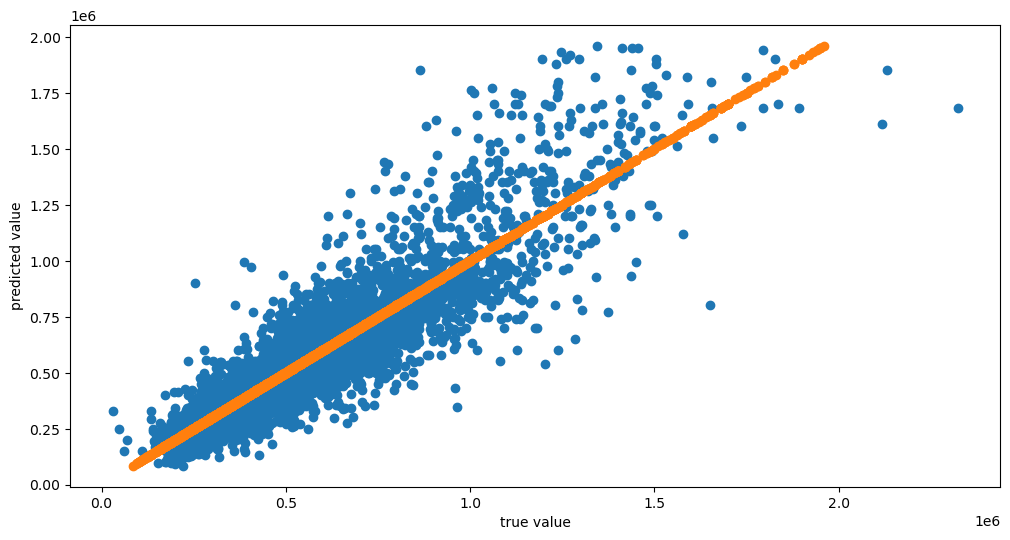

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(predictions,y_test)
plt.scatter(y_test,y_test)
plt.xlabel('true value')
plt.ylabel('predicted value')

In [71]:
new_house = houses_99.drop('price',axis=1).iloc[0].values
new_house = scaler.transform(new_house.reshape(-1,19))
model.predict(new_house)

1/1 [==============================] - 0s 28ms/step


array([[1211614.6]], dtype=float32)

In [72]:
houses_99.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6


Still the model is not performing well, model can only explain 82% of the varience of the data

In [73]:
houses_99['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64